In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from yellowbrick.regressor import PredictionError, ResidualsPlot, ManualAlphaSelection, AlphaSelection

In [58]:
df = pd.read_pickle("car_data_dummy.pkl")

In [59]:
df.shape

(15915, 144)

In [60]:
df.head()

,price,km,previous_owners,inspection_new,nr_of_doors,nr_of_seats,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,...,body_color_Violet,body_color_White,body_color_Yellow,upholstery_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_new_Diesel,fuel_new_LPG/CNG
0,15770,56013.0,2.0,1,5,5,6.0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1,14500,80000.0,1.0,0,3,4,7.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,14640,83450.0,1.0,0,4,4,6.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,14500,73000.0,1.0,0,3,4,6.0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
4,16790,16200.0,1.0,1,5,5,6.0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

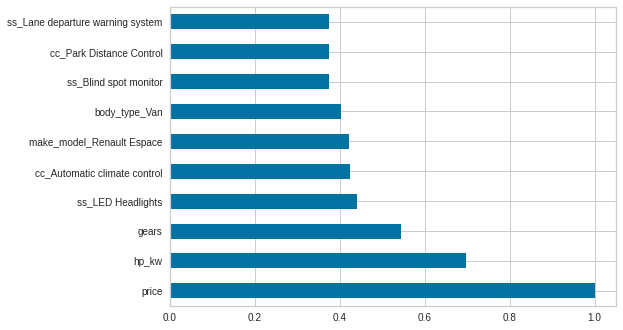

In [61]:
df.corr()["price"].sort_values(ascending=False).head(10).plot.barh()

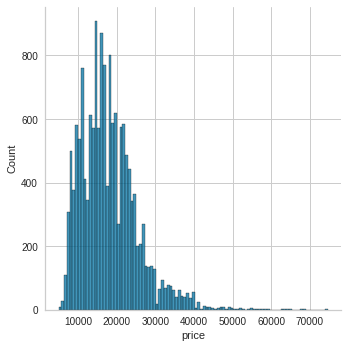

In [62]:
sns.displot(df.price)

/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='price'>

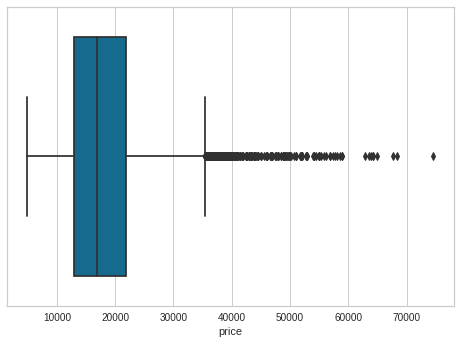

In [63]:
sns.boxplot(df.price, orient="v")

In [64]:
X = df.drop(["price"], axis=1)
y = df["price"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X.shape

(15915, 143)

In [67]:
X_train.shape

(12732, 143)

In [68]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n",
                 "rmse:", rmse)

In [69]:
lm = LinearRegression()

In [70]:
lm.fit(X_train, y_train)

LinearRegression()

In [71]:
df.head()

,price,km,previous_owners,inspection_new,nr_of_doors,nr_of_seats,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,...,body_color_Violet,body_color_White,body_color_Yellow,upholstery_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_new_Diesel,fuel_new_LPG/CNG
0,15770,56013.0,2.0,1,5,5,6.0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1,14500,80000.0,1.0,0,3,4,7.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,14640,83450.0,1.0,0,4,4,6.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,14500,73000.0,1.0,0,3,4,6.0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
4,16790,16200.0,1.0,1,5,5,6.0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


In [72]:
y_pred = lm.predict(X_test)

In [73]:
eval_metrics(y_test, y_pred)

r2_score: 0.8911819282388025 
 mae: 1724.4861527162286 
 mse: 5872648.048024018 
 rmse: 2423.3547094934365


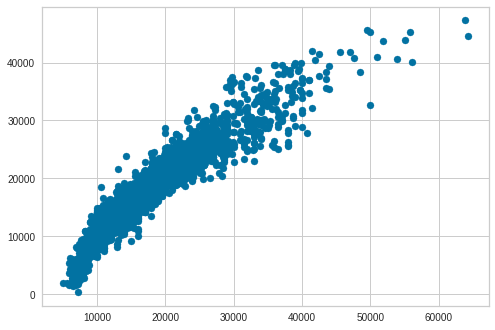

In [74]:
plt.scatter(y_test, y_pred)

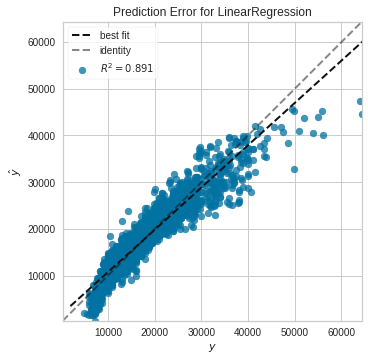

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [75]:
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

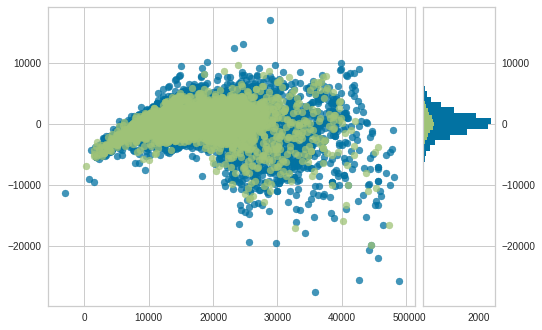

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [76]:
visualizer_residual = ResidualsPlot(lm)

visualizer_residual.fit(X_train, y_train)
visualizer_residual.score(X_test, y_test)
visualizer.show()

In [77]:
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=5)

In [78]:
cv_scores.mean()

0.8833004671323662

In [79]:
# Let's do a Ridge regression now.

ridge_model = Ridge(normalize=True)

In [80]:
ridge_model.fit(X_train, y_train)

Ridge(normalize=True)

In [81]:
y_pred_ridge = ridge_model.predict(X_test)

In [84]:
eval_metrics(y_test, y_pred_ridge)

r2_score: 0.826594021345416 
 mae: 2128.4531254597186 
 mse: 9358301.112854883 
 rmse: 3059.1340462383932


In [85]:
alpha_space = np.linspace(0.1, 20, 50)

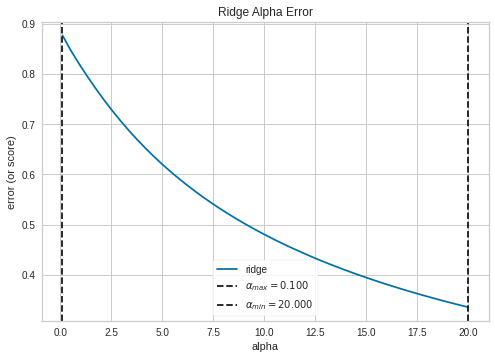

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [87]:
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [88]:
ridge_model_best_alpha = Ridge(0.01, normalize=True).fit(X_train, y_train)

In [89]:
y_pred_best_alpha = ridge_model_best_alpha.predict(X_test)

In [90]:
eval_metrics(y_test, y_pred_best_alpha)

r2_score: 0.8910528128065272 
 mae: 1722.8934676922102 
 mse: 5879616.095509599 
 rmse: 2424.791969532562


In [91]:
# As we can see here, Ridge regression was not the best fit for this dataset.

In [92]:
# Let's try Lasso regression now.

In [94]:
lasso_model = Lasso(normalize=True)

In [96]:
lasso_model.fit(X_train, y_train)

Lasso(normalize=True)

In [97]:
y_pred_lasso = lasso_model.predict(X_test)

In [98]:
eval_metrics(y_test, y_pred_lasso)

r2_score: 0.8811119597668843 
 mae: 1783.8119116527605 
 mse: 6416099.88220145 
 rmse: 2533.00214808465


In [99]:
lasso_cv_model = LassoCV(alphas=alpha_space, normalize=True, cv=5).fit(X_train, y_train)

In [100]:
lasso_cv_model.alpha_

0.1

In [102]:
alpha_values = np.linspace(0.1, 20, 100)

In [103]:
model = LassoCV(alphas=alpha_values, normalize=True)

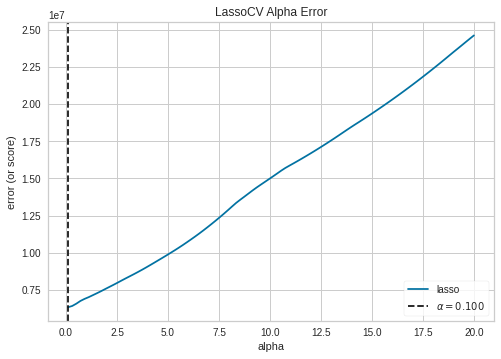

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [104]:
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [105]:
lasso_model = Lasso(0.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8910341654854181 
 mae: 1721.8057428554287 
 mse: 5880622.446312729 
 rmse: 2424.999473466485


In [107]:
# Saving our trained model.

In [108]:
pickle.dump(lm, open("saved_model", "wb"))

In [109]:
# Loading a saved model

In [110]:
trained_model = pickle.load(open("saved_model", "rb"))

In [111]:
# Now let's test our saved trained model with new data.

In [112]:
new_data = {
    "hp": 100,
    "age": 3,
    "km": 50000,
    "model": "A2"
}

In [113]:
new_df = pd.DataFrame.from_dict([new_data])

In [114]:
new_df = pd.get_dummies(new_df).reindex(columns = X.columns, fill_value=0)

In [115]:
pred = trained_model.predict(new_df)

In [116]:
pred

array([14860.88835509])

In [117]:
# Learn more about streamlit to create an interface for a trained model!